In [1]:
import pandas as pd

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#requesting information from wikipedia for the list of Academy Award Winners and Nominees for Best Foreign Languege Film
html_page = requests.get('https://en.wikipedia.org/wiki/List_of_Academy_Award_winners_and_nominees_for_Best_Foreign_Language_Film')
#using the html parser of Beutiful Soup
soup = BeautifulSoup(html_page.content, 'html.parser')

In [6]:
#writnin a function to parse the page information:
def get_text():
    #scrape all tags with ('a')
    titles = soup.find_all('a')  
    countries = []
    for i in range(len(titles)):
        
        texts = titles[i].get_text()
        
        countries.append(texts)
    return countries

In [7]:
#cleaning the list we receive, mainly the begining and the end, because we would like to see the nominees from 1956 to 2018
list1=get_text()

del list1 [0:140]
list2 = list1

list3= []
for i in list2:
    if i == '[K]' or i=='':
        del i
    else:
        list3.append(i)
del list3[1148:]

In [8]:
#importing two lists from a different file, containing the names of all the current countries and the world
from countries1 import world_countries,former_countries


In [9]:
#cleaning our data with a loop and extract all the countries nominees
list4=[]

for i in list3:
    
    if i in world_countries or i in former_countries:
        list4.append(i)
    else:
        pass

#creating unique countries list to help us create later histogtam to count the number og nominees
unique_countries = set(list4)


In [10]:
len(unique_countries)


53

In [14]:
#creating a dictionery histogram and count with a loop the number of nominantions fo each country

country_histogram = dict.fromkeys(unique_countries, 0)

for word in list4:
    country_histogram[word] = country_histogram[word]+ 1

In [15]:
#creating pandas data frame the histogram dictionaery
df=pd.DataFrame.from_dict(country_histogram, orient='index').reset_index()
df.columns=['Country','Nomenees']
df = df.set_index("Country")
df.head()

,Nomenees
Country,
Georgia,1
Israel,10
France,37
Germany (East),1
Macedonia,1


In [16]:
#adding information from countries who don't exist anymore to their sucsessors
#is just example, we know politically it can also go to other sucsessors

df['Nomenees']['Russia']=16
df['Nomenees']['Germany']=20
df['Nomenees']['Czech Republic']=9
#after adding their information to other countries - droping former countries from the data frame
df =df.drop(['Soviet Union','Germany (East)','Germany (West)','Czechoslovakia'])




In [18]:
df.head()

,Nomenees
Country,
Georgia,1
Israel,10
France,37
Macedonia,1
Germany,20


In [19]:
#reset index beofre merging with other table
df = df.reset_index()

In [20]:
df.head()

,Country,Nomenees
0,Georgia,1
1,Israel,10
2,France,37
3,Macedonia,1
4,Germany,20


In [17]:
#import csv file with the world population at 2017
df2=pd.read_csv('world_population_2017.csv')

df2.head()

,Data Source,Unnamed: 1
0,NaN,NaN
1,Last Updated Date,NaN
2,NaN,NaN
3,Country Name,2017.0
4,Aruba,105264.0


In [21]:
#left merging of the two data frames, based on matching the country names
movies_df = pd.merge(df, df2, left_on ='Country', right_on='Data Source',how = 'left',suffixes=('', '_y'))
movies_df.head()

,Country,Nomenees,Data Source,Unnamed: 1
0,Georgia,1,Georgia,3717100.0
1,Israel,10,Israel,8712400.0
2,France,37,France,67118648.0
3,Macedonia,1,NaN,NaN
4,Germany,20,Germany,82695000.0


In [ ]:
movies_df= movies_df.set_index("Country")

In [28]:
#renaming columns
movies_df.rename(columns={'Unnamed: 1':'Population 2017'}, inplace=True)
movies_df.head()

,Nomenees,Data Source,Population 2017
Country,,,
Georgia,1,Georgia,3717100.0
Israel,10,Israel,8712400.0
France,37,France,67118648.0
Macedonia,1,NaN,NaN
Germany,20,Germany,82695000.0


In [31]:
#droping columns we do not need
movies_df = movies_df.drop(columns=['Data Source'])
movies_df.head()

,Nomenees,Population 2017
Country,,
Georgia,1,3717100.0
Israel,10,8712400.0
France,37,67118648.0
Macedonia,1,NaN
Germany,20,82695000.0


In [35]:
#updating manualy countries who their population was missing in the merged table
movies_df['Population 2017']['Iran']= 81160000
movies_df['Population 2017']['Macedonia']=2740000
movies_df['Population 2017']['Taiwan']=23580000
movies_df['Population 2017']['Ivory Coast']=24290000
movies_df['Population 2017']['Russia']=144500000



C:\Users\homer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\homer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\homer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\homer\Anac

In [37]:
#adding additional column showing the ration between the country populations and the number of nominees
movies_df['ratio-nomenees-population']= movies_df["Population 2017"]/movies_df["Nomenees"]
movies_df.head()

,Nomenees,Population 2017,ratio-nomenees-population
Country,,,
Georgia,1,3717100.0,3.717100e+06
Israel,10,8712400.0,8.712400e+05
France,37,67118648.0,1.814018e+06
Macedonia,1,2740000.0,2.740000e+06
Germany,20,82695000.0,4.134750e+06


In [39]:
#fixing spelling mistake in the column name
movies_df.rename(columns={"Nomenees":"Nominees"}, inplace=True)
movies_df.head()

,Nominees,Population 2017,ratio-nomenees-population
Country,,,
Georgia,1,3717100.0,3.717100e+06
Israel,10,8712400.0,8.712400e+05
France,37,67118648.0,1.814018e+06
Macedonia,1,2740000.0,2.740000e+06
Germany,20,82695000.0,4.134750e+06


In [53]:
#creating new data frame sorted by ascending values of ratio between popluation and nominees
ratio = movies_df.sort_values(by='ratio-nomenees-population').reset_index()
ratio.head()

,Country,Nominees,Population 2017,ratio-nomenees-population
0,Iceland,1,341284.0,341284.00
1,Denmark,12,5769603.0,480800.25
2,Sweden,16,10067744.0,629234.00
3,Israel,10,8712400.0,871240.00
4,Hungary,10,9781127.0,978112.70


In [50]:
#creating new data sorted by ascending order of nominess number
nominees = movies_df.sort_values(by='Nominees').reset_index()

,Country,Nominees,Population 2017,ratio-nomenees-population
0,Georgia,1,3717100.0,3717100.0
1,Peru,1,32165485.0,32165485.0
2,Finland,1,5511303.0,5511303.0
3,Nepal,1,29304998.0,29304998.0
4,Ivory Coast,1,24290000.0,24290000.0


Text(0.5, 1.0, 'Countries with most Academy Awards Nominees')

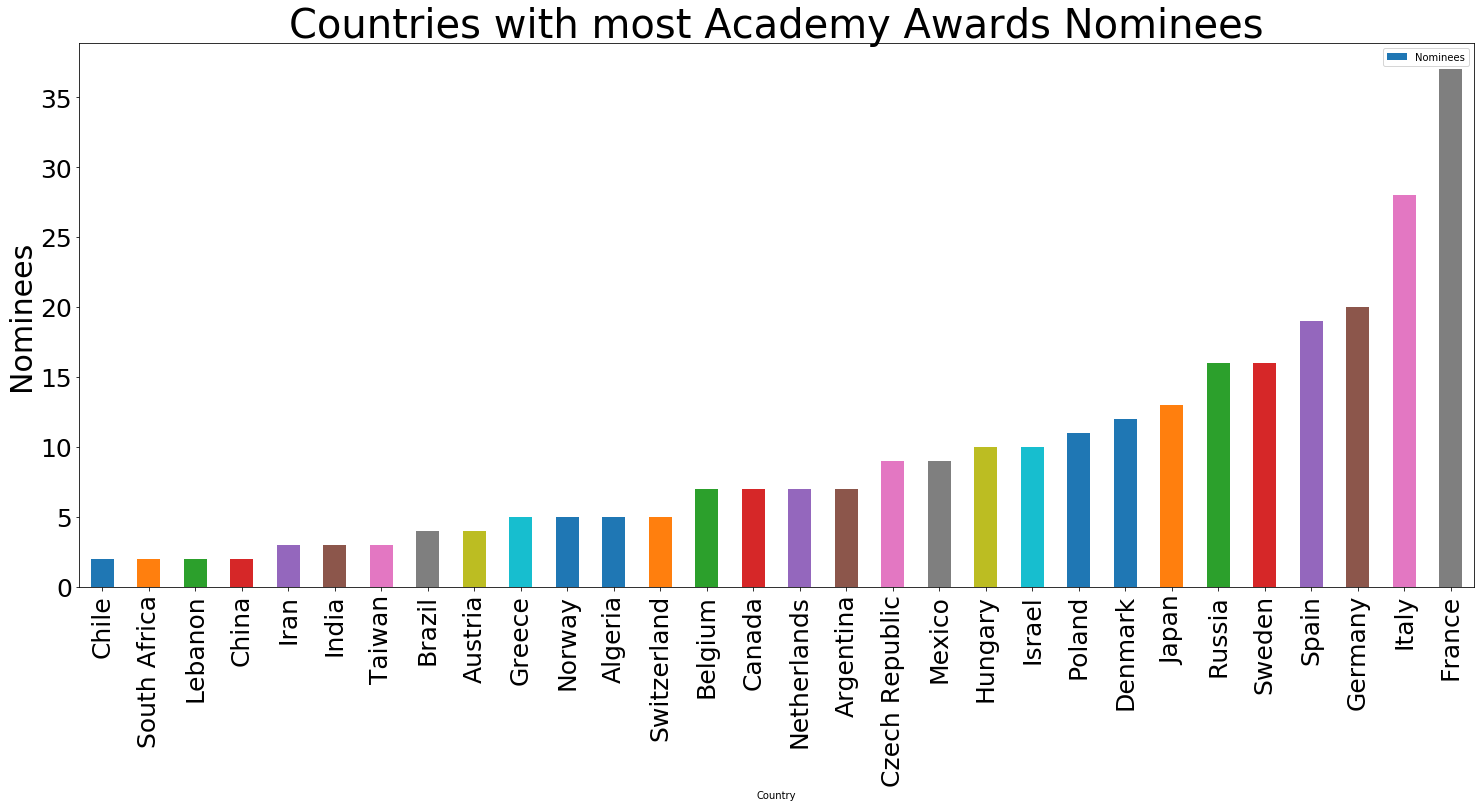

In [51]:
#ploting the leading 30 countries on the nominees list
Table = nominees[19:].plot.bar(x='Country', y='Nominees',figsize=(25,10) ,fontsize=25)
Table.set_ylabel("Nominees",fontsize=30)
Table.set_title("Countries with most Academy Awards Nominees",fontsize=40)

Text(0.5, 1.0, 'Countries with most Academy Awards Nominees Relative to Population')

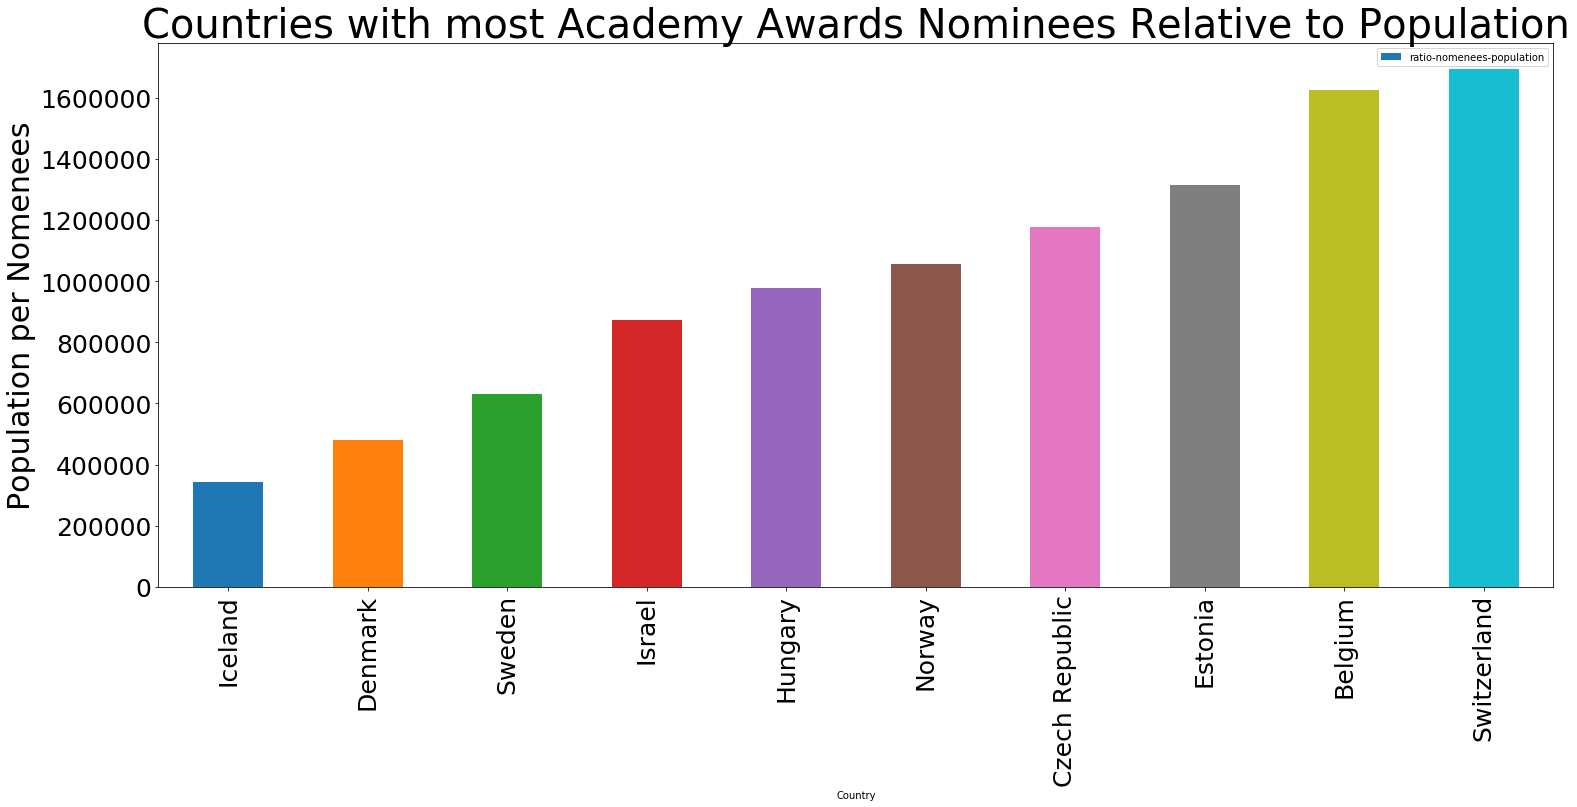

In [54]:
#plotting the leading 10 countried with the best ratio between population and nominees
Table1 = ratio[0:10].plot.bar(x='Country', y='ratio-nomenees-population',figsize=(25,10) ,fontsize=25)
Table1.set_ylabel("Population per Nomenees",fontsize=30)
Table1.set_title("Countries with most Academy Awards Nominees Relative to Population",fontsize=40)